In [302]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import preprocessing as pp

In [303]:
data = pd.read_csv(r'data/alquiler_AMBA_dev.csv')
print(data.shape)

C:\Users\03tom\AppData\Local\Temp\ipykernel_9688\3755051595.py:1: DtypeWarning: Columns (8,33,36) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(r'data/alquiler_AMBA_dev.csv')


(278725, 45)


# Preprocesamiento

## Caracteristics no estricturales

En esta seccion discutimos la importancia de variables propias de la propiedad que no son estructurales (cuartos, baños, etc) pero tampoco son amenities. Son cosas extra que puede o no tner una propiedad que pueden influir el precio. Estas variables las consideramos con una prioridad intermedia, por lo que el estandard para las variables binarias (todas menos una) va a ser: que tengan al ,enos 3% de sus datos como verdaderos, y que los valores nulos no superen los 12-15% de los datos.

In [304]:
# Lista de las categorias consideradas como caracteristicas extra de la propiedad
extra = ["Cisterna", "AccesoInternet", "Calefaccion", "AireAC", "Estacionamiento", "Chimenea", "Cocheras", "SistContraIncendios", "Ascensor", "Seguridad", "Lobby", "Recepcion"]

# creamos un dataframe solo de los extra
data_extra = data[extra].copy()
data_extra['Precio'] = data['precio_pesos_constantes']
print(data_extra.shape)  

# valores posibles dentro de cada columna
for col in extra:
    print(col, data_extra[col].unique())

(278725, 13)
Cisterna [nan '0' 'No' '   0' 'Sí']
AccesoInternet ['0.0' 'No' '0' 'Sí' nan '   0' '1.0' '1']
Calefaccion ['0.0' 'No' '1.0' '0' nan '1' '   0' 'Sí']
AireAC ['0.0' 'Sí' '1.0' 'No' '0' '1' nan '   0']
Estacionamiento ['0.0' '0' nan 'No' '   0' 'Sí' '1.0' '1']
Chimenea ['0.0' '0' nan 'No' '   0' 'Sí' '1' '1.0']
Cocheras [  0   2   1   3   8   4  89   6   5  10  -4  18  11  23  22  50   9 239
   7  26  13  -1 100  30  12  20  19  15  40]
SistContraIncendios [nan '0' '0.0' '   0' 'No' 'Sí' 0.0]
Ascensor [nan '0' 'No' 'Sí' '   0']
Seguridad ['0.0' 'No' 'Sí' nan '0' '   0' '1' '1.0']
Lobby [nan  0.]
Recepcion ['0.0' '0' nan 'No' '   0' 'Sí' '1.0' '1']


In [305]:
for col in extra:
    if col == 'Cocheras':
        continue
    pp.preprocess_binary_categories(data_extra, col)
    print(col, data_extra[col].unique())
print('Cocheras',data_extra['Cocheras'].unique())

Cisterna [nan  0.  1.]
AccesoInternet [ 0.  1. nan]
Calefaccion [ 0.  1. nan]
AireAC [ 0.  1. nan]
Estacionamiento [ 0. nan  1.]
Chimenea [ 0. nan  1.]
SistContraIncendios [nan  0.  1.]
Ascensor [nan  0.  1.]
Seguridad [ 0.  1. nan]
Lobby [nan  0.]
Recepcion [ 0. nan  1.]
Cocheras [  0   2   1   3   8   4  89   6   5  10  -4  18  11  23  22  50   9 239
   7  26  13  -1 100  30  12  20  19  15  40]


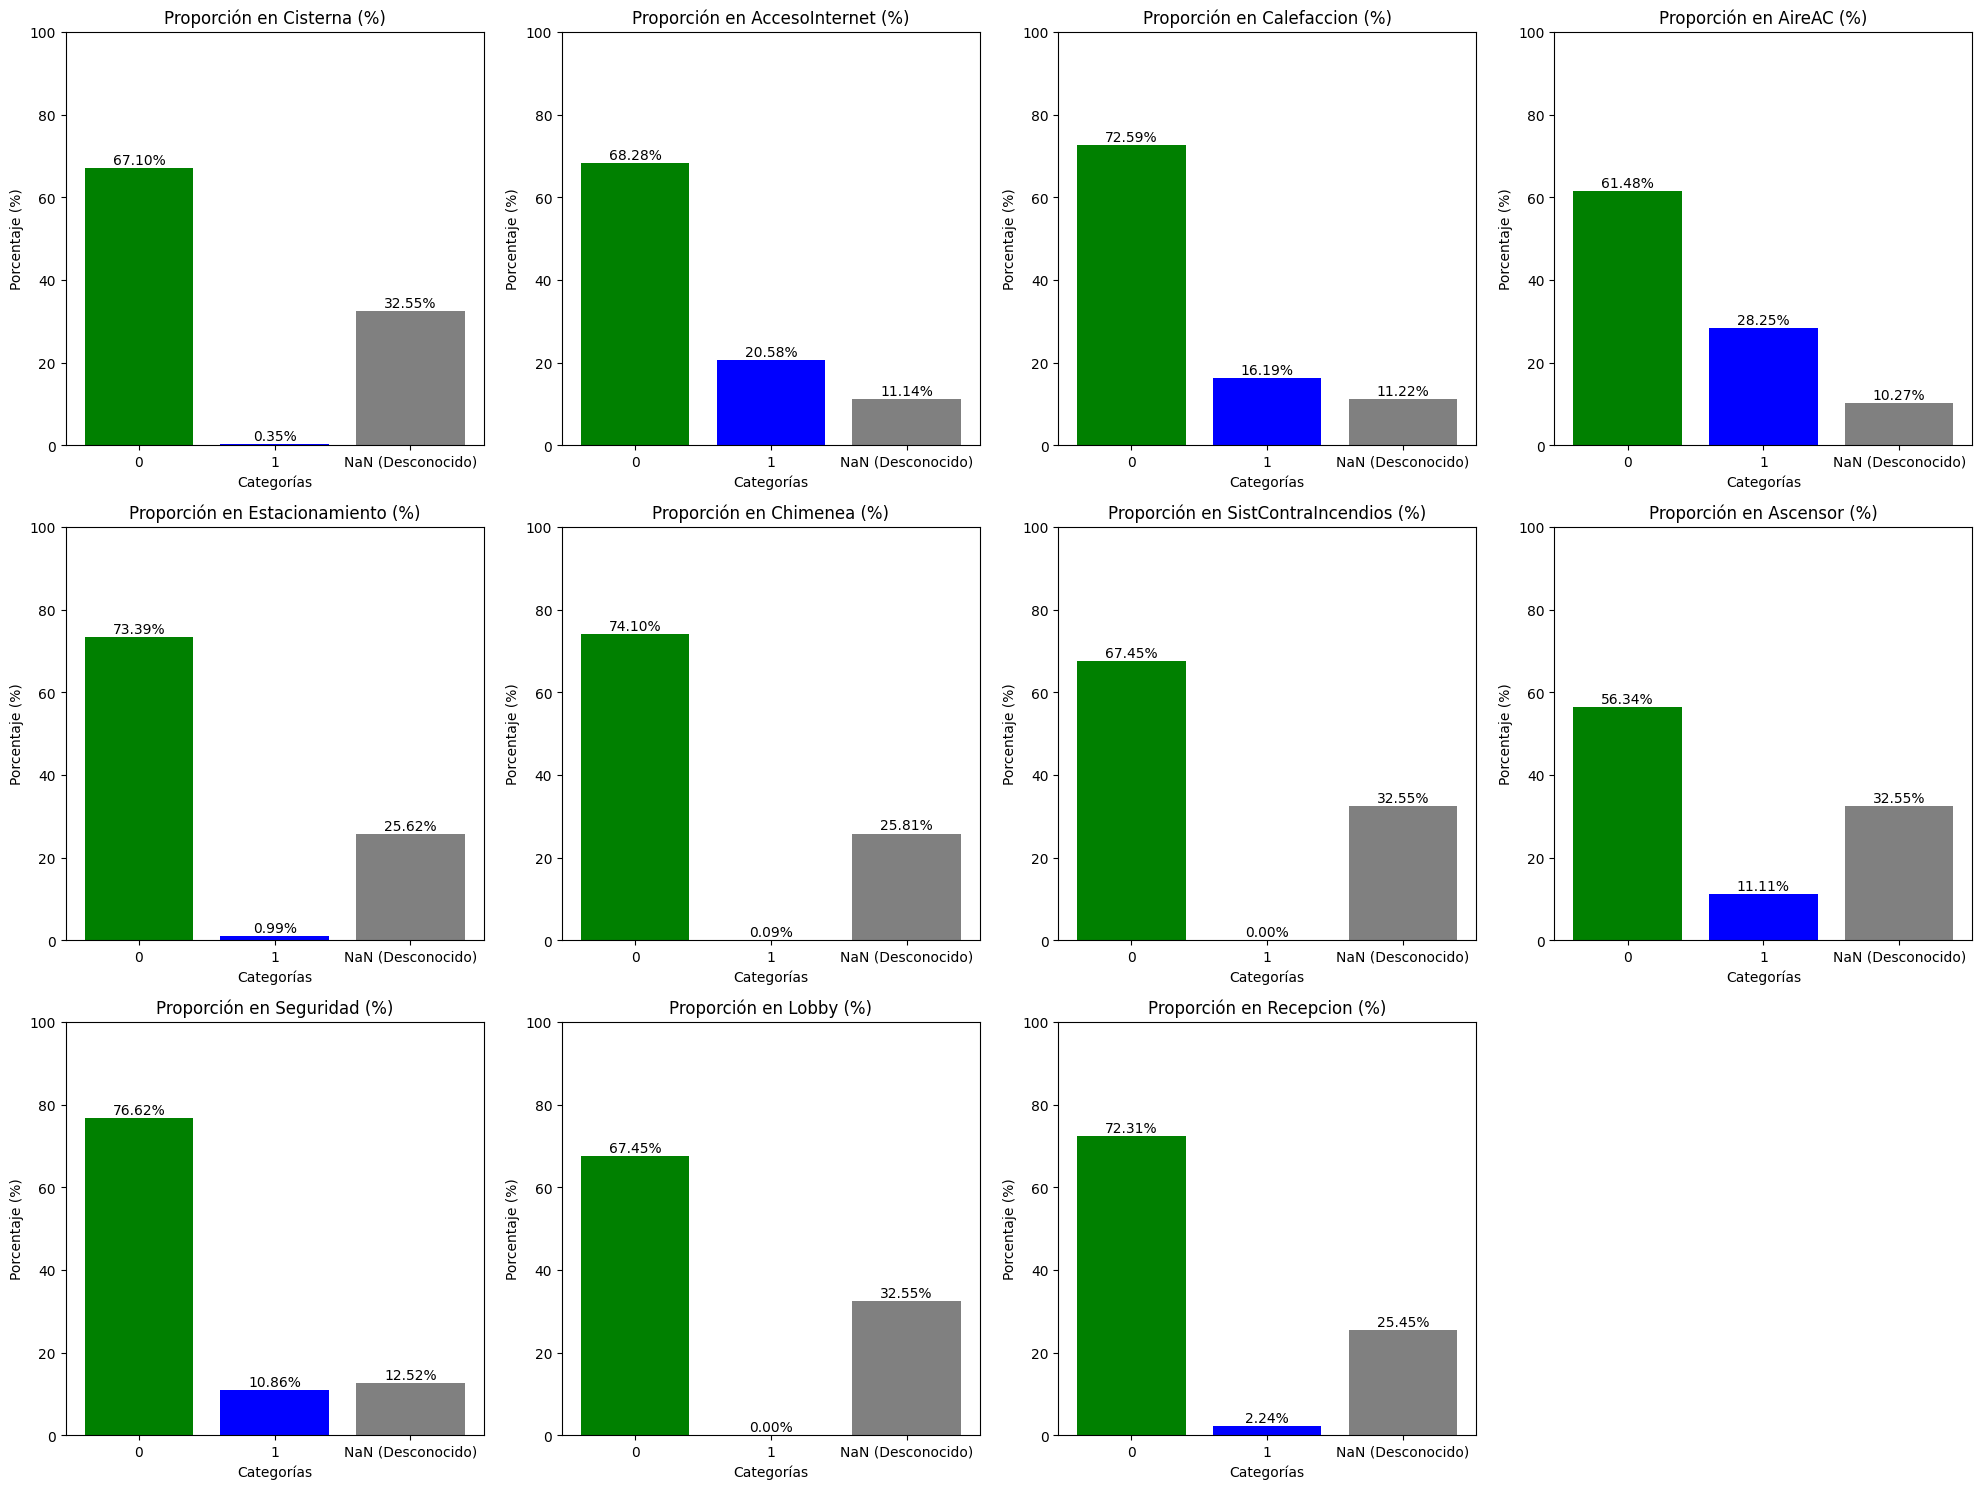

In [306]:
#quitar 'Cocheras' de la lista de extra
extra.remove('Cocheras')
pp.get_binary_plot(data_extra, extra)

A partir de aca podemos descartar algunas de las categorias que no cumplan con alguno de estos estandares (por ejemplo, las que tiene <2.3% de datos verdaderos no nos van a poder dar informacion relevante, y por ejemplo la que, si bien tiene 11% de valores positivos, tiene casi 33% de valores inciertos, lo que no nos da buena garantia de la infromacion). Por otro lado, las categorias restantes (Seguridad, Calefaccion, AC y Accesso a Internet) las vamos a analizar en detalle para ver si podemos sacar alguna informacion relevante de ellas.

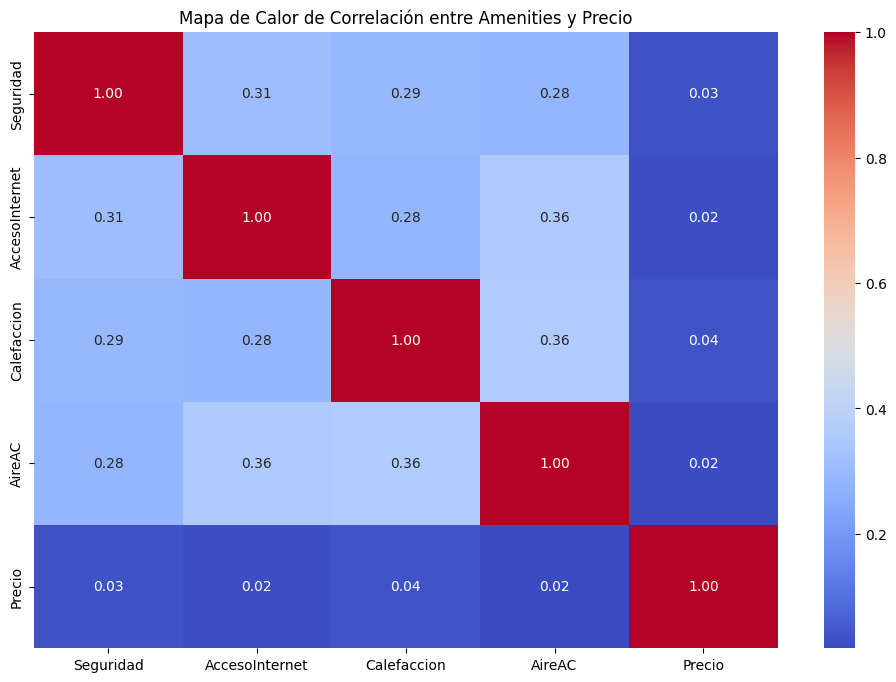

In [307]:
#matriz de correlacion
correlation_matrix = data_extra[['Seguridad', 'AccesoInternet', 'Calefaccion', 'AireAC', 'Precio']].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title('Mapa de Calor de Correlación entre Amenities y Precio')
plt.show()

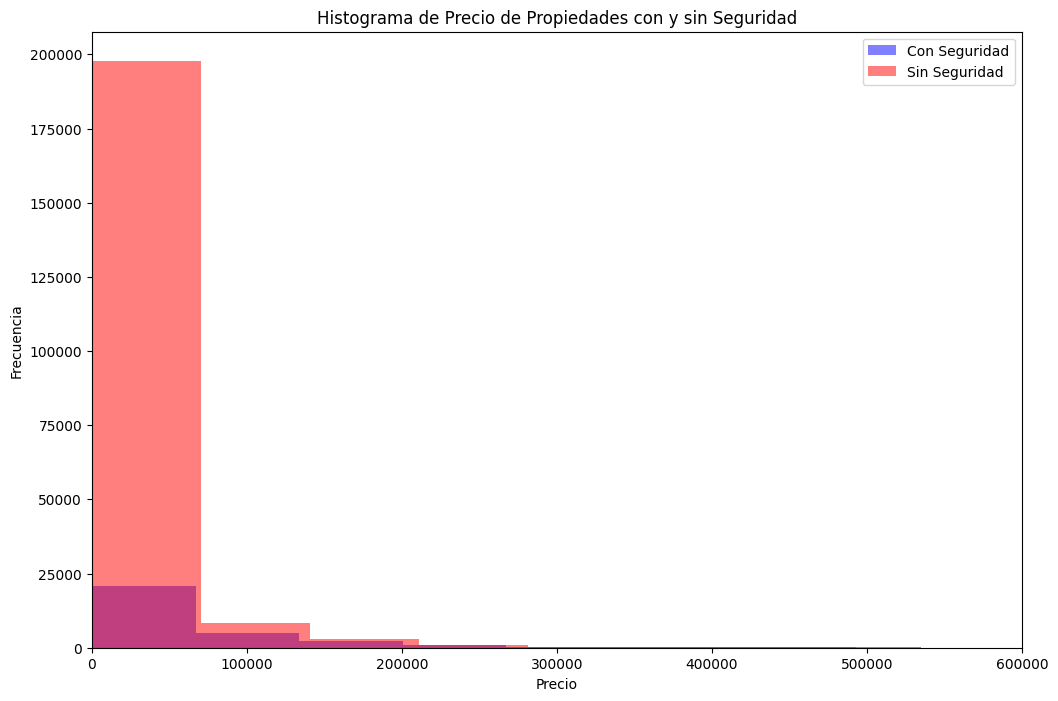

In [308]:
#graficar dos histogramas, uno para propiedades con seguridad y otro para propiedades sin seguridad
plt.figure(figsize=(12, 8))
plt.hist(data_extra[data_extra['Seguridad'] == 1]['Precio'], bins=500, alpha=0.5, color='blue', label='Con Seguridad')
plt.hist(data_extra[data_extra['Seguridad'] == 0]['Precio'], bins=500, alpha=0.5, color='red', label='Sin Seguridad')
plt.title('Histograma de Precio de Propiedades con y sin Seguridad')
plt.xlabel('Precio')
plt.ylabel('Frecuencia')
plt.xlim(0, 0.06e7)
plt.legend()
plt.show()  

In [309]:
# Supongamos que el DataFrame es 'df' y las columnas son 'seguridad' y 'precio'
stats_con_seguridad = data_extra[data_extra['Seguridad'] == 1]['Precio'].describe()
stats_sin_seguridad = data_extra[data_extra['Seguridad'] == 0]['Precio'].describe()

print("Con seguridad:\n", stats_con_seguridad)
print("Sin seguridad:\n", stats_sin_seguridad)

# aca decimos que singifica cada valor que se presenta abajo: count --> cantidad de datos, mean --> promedio, std --> desviacion estandar, min --> minimo, 25% --> primer cuartil, 50% --> mediana, 75% --> tercer cuartil, max --> maximo
# ahora graficamos los histogramas de las propiedades con y sin seguridad

Con seguridad:
 count    3.025700e+04
mean     1.382428e+05
std      1.027297e+06
min      2.124534e+02
25%      1.313660e+04
50%      3.165664e+04
75%      8.753774e+04
max      3.340594e+07
Name: Precio, dtype: float64
Sin seguridad:
 count    2.135730e+05
mean     7.356711e+04
std      6.158120e+05
min      4.264038e+01
25%      6.416502e+03
50%      8.655936e+03
75%      1.505390e+04
max      3.518759e+07
Name: Precio, dtype: float64


## Amenities

Ahora vemos las categorias que listamos como 'amenitites' en el dataset. Por lo que podemos ver en nuestro dataset, estas variables son de tipo booleanas, y no se consideran categorias fundamentales a la hora de determinar el precio de una propiedad. Por tanto, el estandard que vamos a considerar para estas categorias sera el sigueinte: deben tener al menos 5% de sus datso como verdadero (sino muy complicado sacar informacion), y ademas, no deben tener mas del 10% de sus datos como faltantes (esto hace que sea dificil reemplazar estos datos).

In [310]:
# Lista de las categorias consideradas como amenities
amenities = ["Gimnasio", "Laundry", "AreaParrillas", "CanchaTennis", "AreaJuegosInfantiles", "BusinessCenter", "SalonDeUsosMul", "PistaJogging", "EstacionamientoVisitas", "Pileta", "SalonFiestas", "Jacuzzi"]

# creamos un dataframe solo de los amenities
data_amenities = data[amenities].copy()
data_amenities['Precio'] = data['precio_pesos_constantes']
print(data_amenities.shape)  

# valores posibles dentro de cada columna
for col in amenities:
    print(col, data_amenities[col].unique())

(278725, 13)
Gimnasio ['0.0' 'No' '0' nan '   0' '1.0' 'Sí' '1']
Laundry ['0.0' 'No' nan '0' '1' '1.0' 'Sí' '   0']
AreaParrillas [ 0. nan  1.]
CanchaTennis ['0.0' '0' 'No' nan '   0' 'Sí' '1.0' '1']
AreaJuegosInfantiles [nan '0' 'No' '   0' 'Sí']
BusinessCenter ['0.0' '0' nan 'No' '   0' 'Sí' '1.0' '1']
SalonDeUsosMul ['0.0' 'No' '0' '1.0' nan '   0' '1' 'Sí']
PistaJogging [nan  0.]
EstacionamientoVisitas ['0.0' '0' nan 'No' '   0' 'Sí' '1.0' '1']
Pileta ['0.0' 'No' '0' '1' '1.0' nan '   0' 'Sí']
SalonFiestas ['0.0' '0' nan 'No' '1.0' '   0' 'Sí' '1']
Jacuzzi ['0.0' 'No' nan '0' '   0' 'Sí' '1.0' '1']


Corrijamos esto para que solo tenga valores de 0 o 1 (o Nan)

In [311]:
for col in amenities:
    pp.preprocess_binary_categories(data_amenities, col)
    print(col, data_amenities[col].unique())

Gimnasio [ 0. nan  1.]
Laundry [ 0. nan  1.]
AreaParrillas [ 0. nan  1.]
CanchaTennis [ 0. nan  1.]
AreaJuegosInfantiles [nan  0.  1.]
BusinessCenter [ 0. nan  1.]
SalonDeUsosMul [ 0.  1. nan]
PistaJogging [nan  0.]
EstacionamientoVisitas [ 0. nan  1.]
Pileta [ 0.  1. nan]
SalonFiestas [ 0. nan  1.]
Jacuzzi [ 0. nan  1.]


Vemos que ahora solo tienen valores de 0 o 1 (o Nan), por lo tanto podemos averiguar que tan utiles nos pueden ser estas categorias para predecir el precio de un departamento.

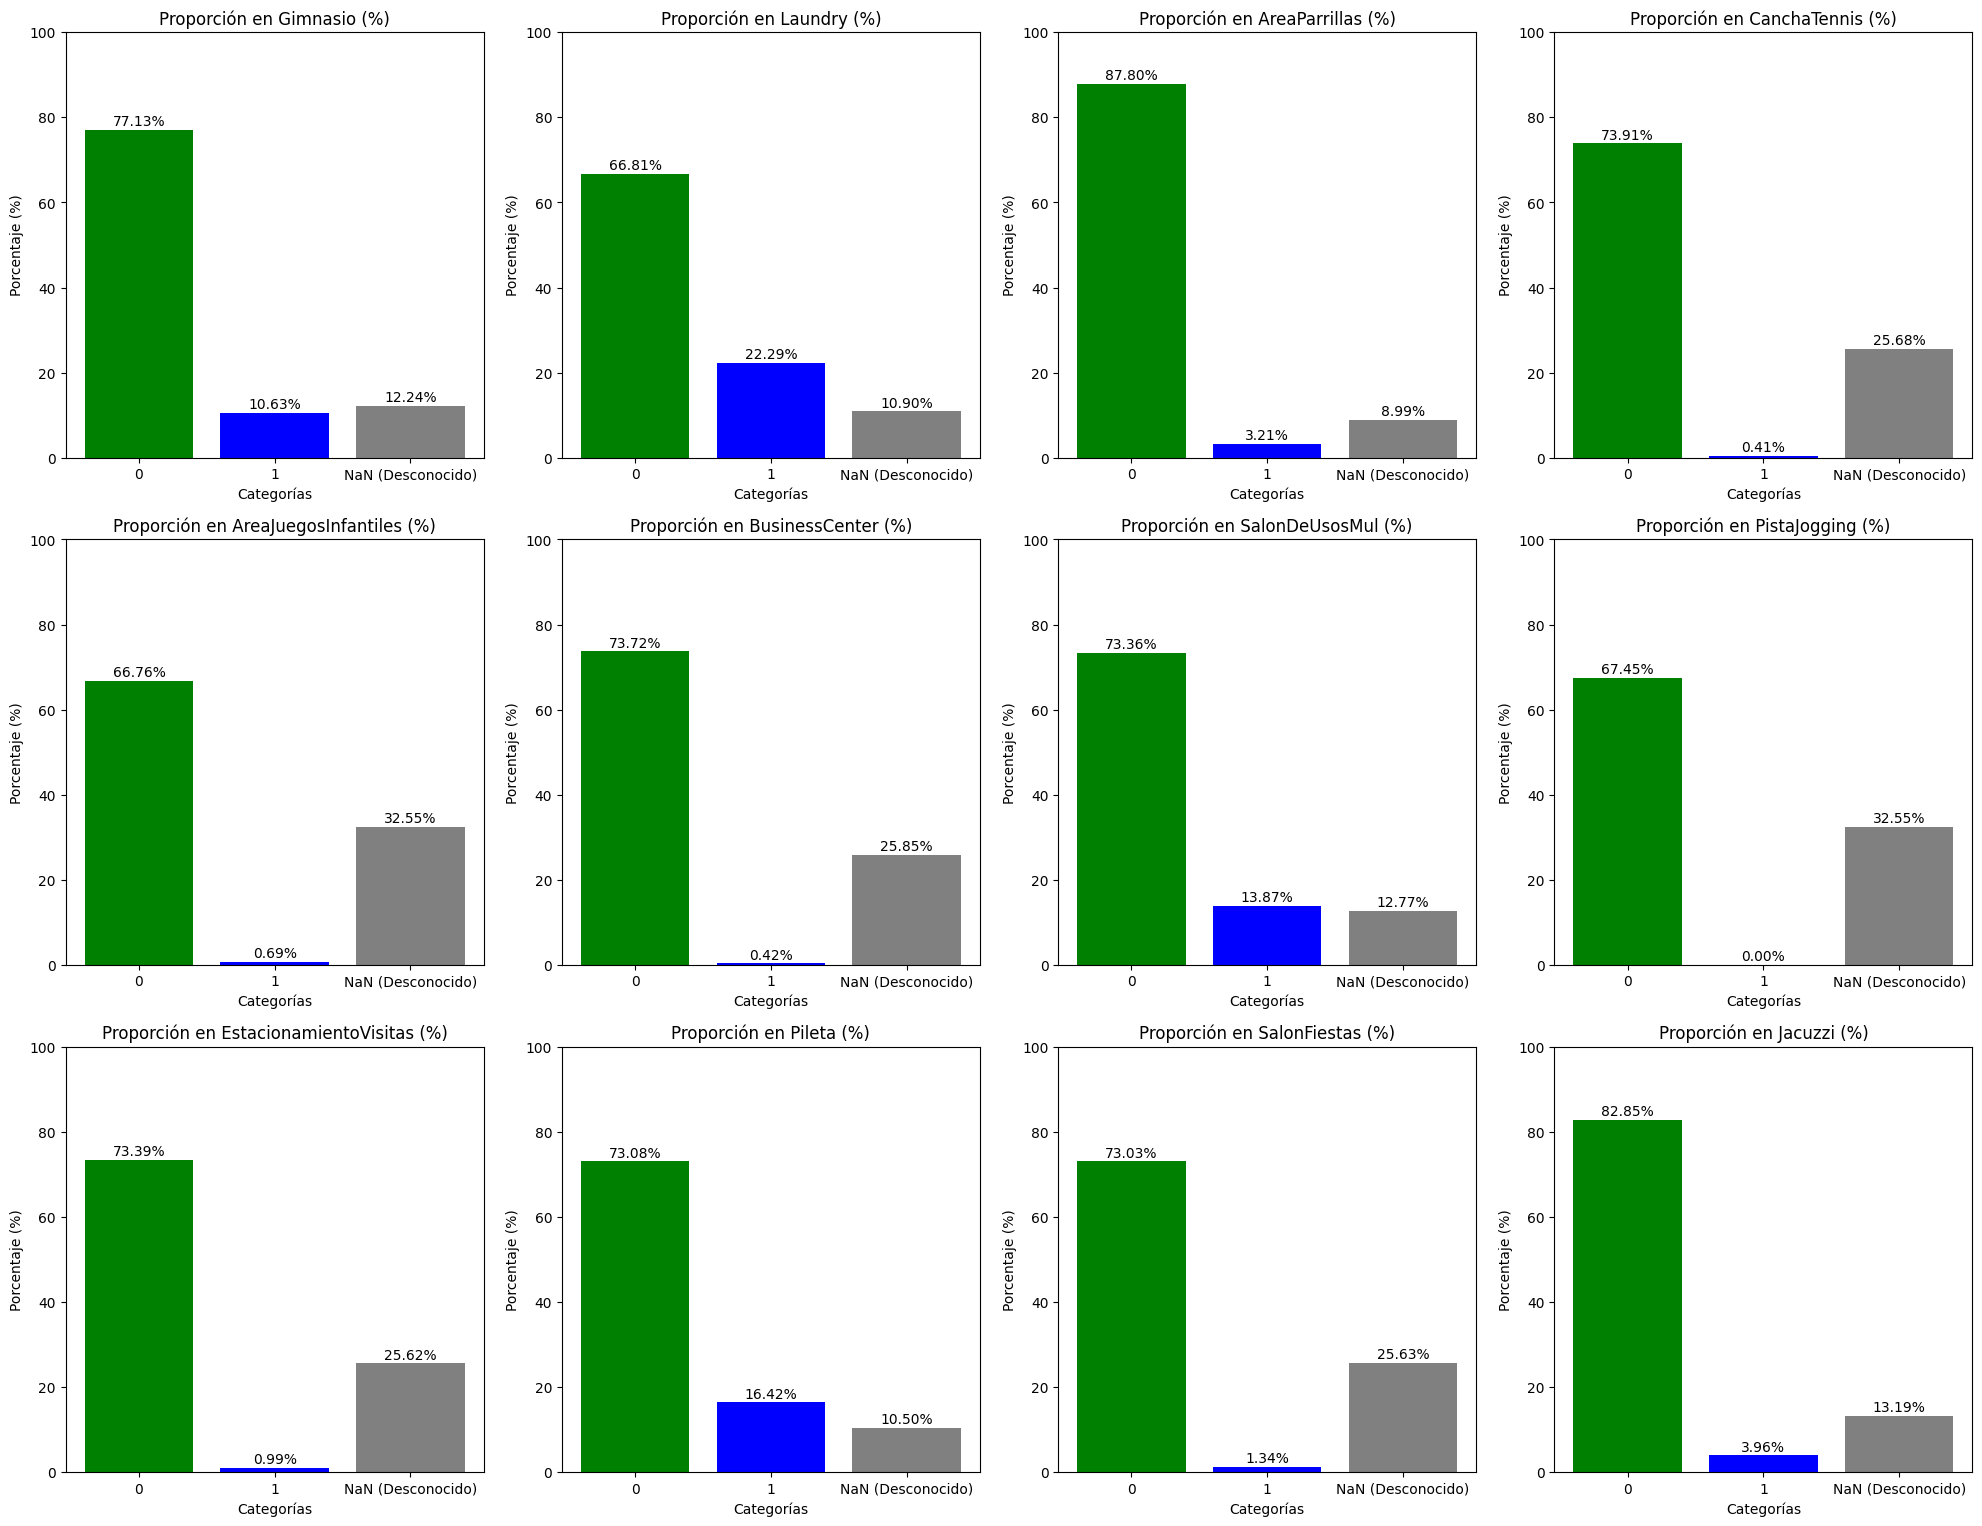

In [312]:
pp.get_binary_plot(data_amenities,amenities)

Ademas, nos fijamos si alguna de las caegorias tiene cierta correlacion con el precio.

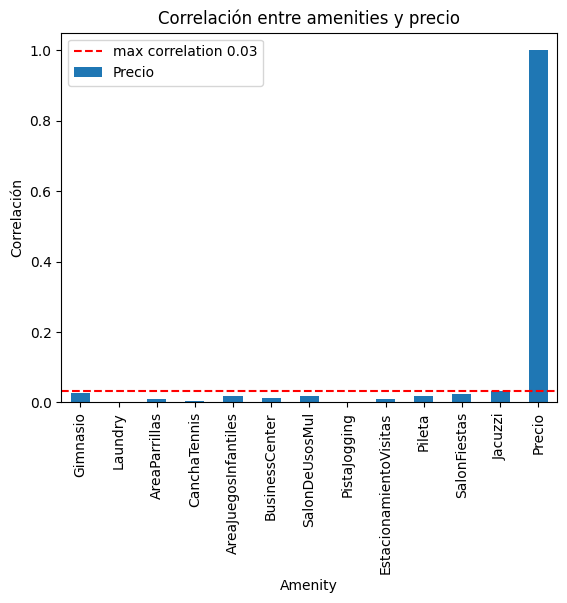

In [313]:
correlation_matrix = data_amenities[amenities + ['Precio']].corr()
correlation_matrix['Precio'].plot(kind='bar')
plt.axhline(y=correlation_matrix['Precio'].nlargest(2).iloc[-1], color='r', linestyle='--', label=f'max correlation {np.round(correlation_matrix["Precio"].nlargest(2).iloc[-1], 2)}')
plt.title('Correlación entre amenities y precio')
plt.ylabel('Correlación')
plt.xlabel('Amenity')
plt.legend()
plt.show()

Ninguna de las categorías cumple con el estándar acordado para la categoría de amenities (es decir, que tengan al menos 5% de "sí" y menos del 10% de "NaN"). Por lo tanto, no vamos a considerar ninguna de estas en el dataset de nuestro modelo. Sin embargo, se podrian considerar usar algunas de estas categorias (que estan cerca de cumplir los criterios), por lo que vamos a estudiar si existe algun cambio de variabilidad para estas categorias.

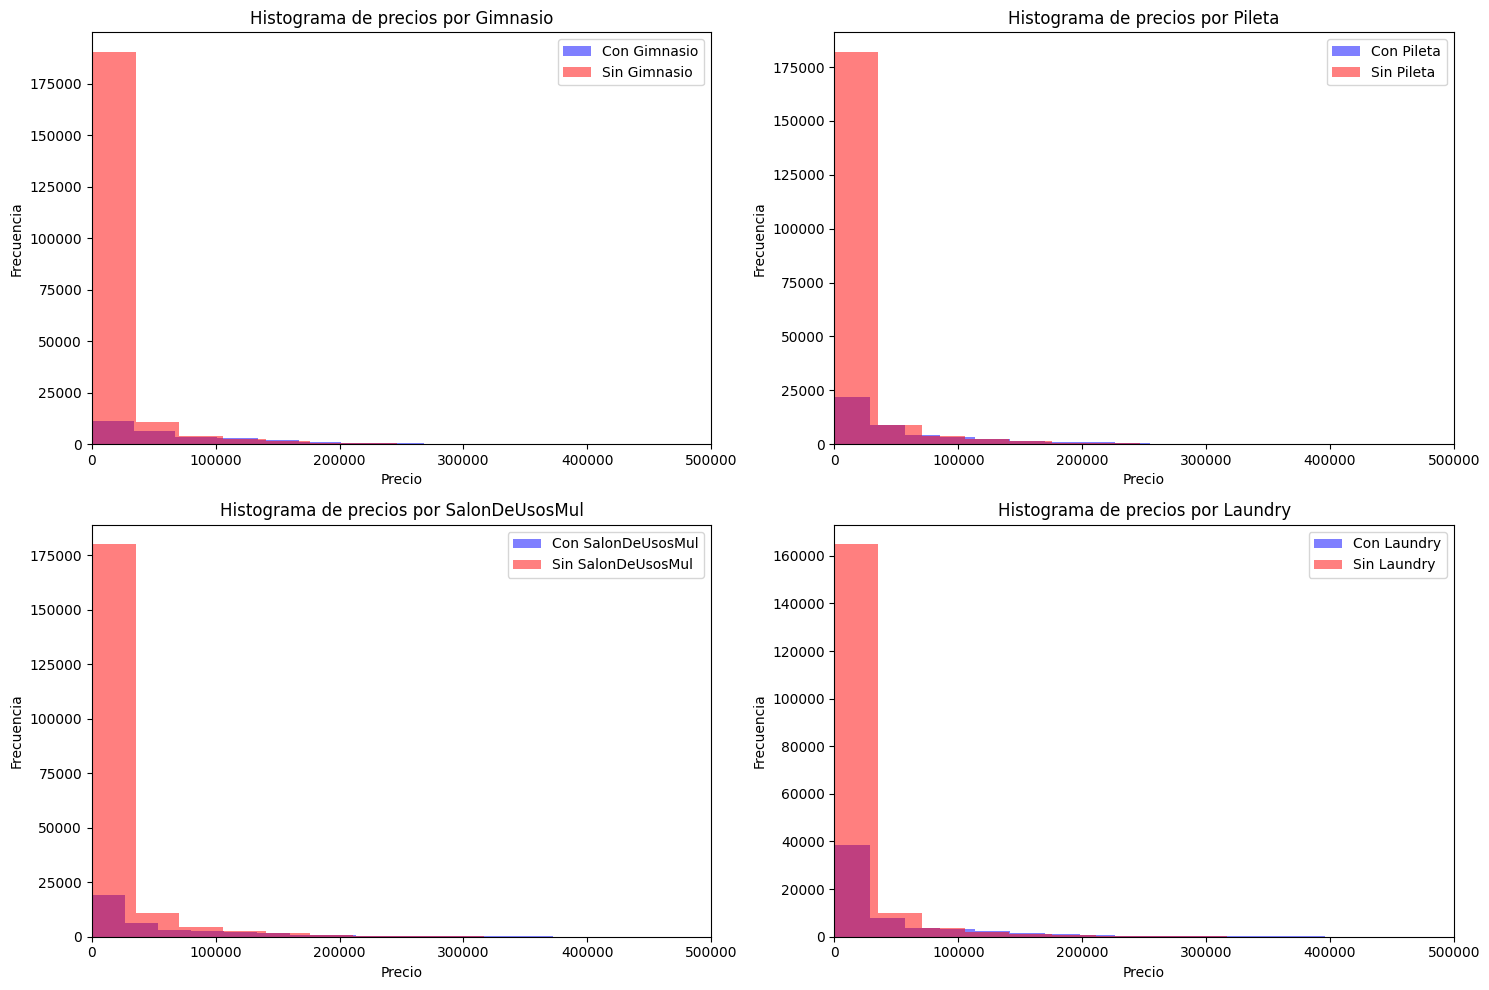

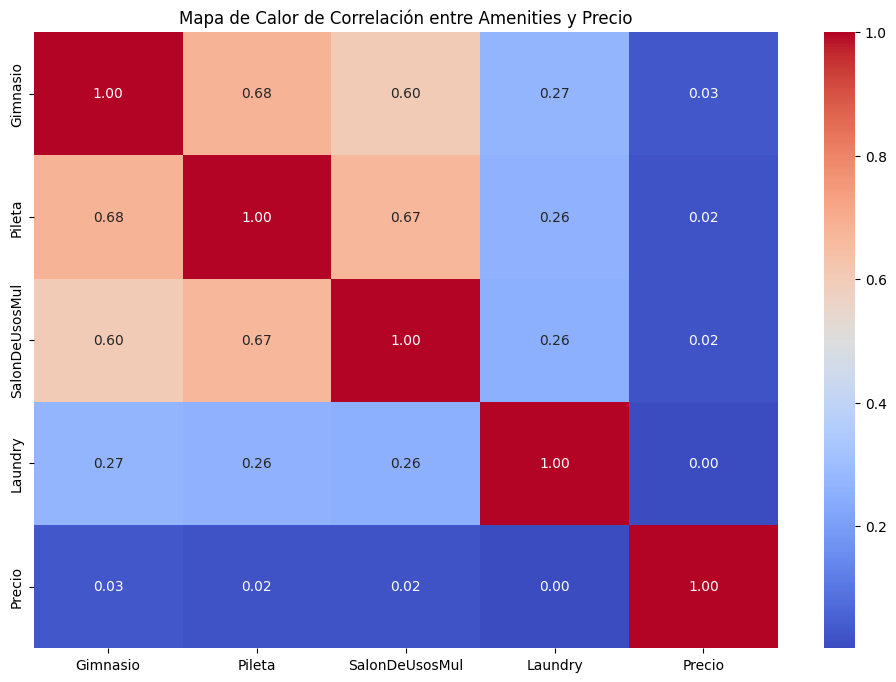

In [314]:
#histogramas
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.flatten()

for i, amenity in enumerate(['Gimnasio', 'Pileta', 'SalonDeUsosMul', 'Laundry']):
    axes[i].hist(data_amenities[data_amenities[amenity] == 1]['Precio'], bins=1000, alpha=0.5, color='blue', label='Con ' + amenity)
    axes[i].hist(data_amenities[data_amenities[amenity] == 0]['Precio'], bins=1000, alpha=0.5, color='red', label='Sin ' + amenity)
    axes[i].set_title(f'Histograma de precios por {amenity}')
    axes[i].set_xlabel('Precio')
    axes[i].set_ylabel('Frecuencia')
    axes[i].set_xlim(0, 0.5e6)
    axes[i].legend()
plt.tight_layout()
plt.show()

#matriz de correlacion
correlation_matrix = data_amenities[['Gimnasio', 'Pileta', 'SalonDeUsosMul', 'Laundry', 'Precio']].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title('Mapa de Calor de Correlación entre Amenities y Precio')
plt.show()

Como podemos ver, no solo que no cumplen con los criterios, sino que ademas, no hay una variabilidad significativa en los datos (correlacion maxima de 0.03). Por lo tanto, no vamos a considerar ninguna de estas categorias en nuestro modelo.

## Carcteristicas de contexto de la propiedad

Como las variables de contexto de la propiedad son binarias, al igual que las anterirores, y las consideramos tambien de baja importancia, aplican los mismos estandares que para las categrorias anteriores. Primero nos fijamos los posibles valores y corregimos:

In [315]:
context = ['AreaCine', 'LocalesComerciales']

data_context = data[context].copy()
data_context['Precio'] = data['precio_pesos_constantes']
print(data_amenities.shape)  

for col in context:
    print(col, data_context[col].unique())

(278725, 13)
AreaCine [nan '0' '   0' 'No' 0.0]
LocalesComerciales [nan  0.]


In [316]:
for col in context:
    pp.preprocess_binary_categories(data_context, col)
    print(col, data_context[col].unique())

AreaCine [nan  0.]
LocalesComerciales [nan  0.]


Una vez correjidos, nos fijamos si cumplen o no con los estandares propuestos:

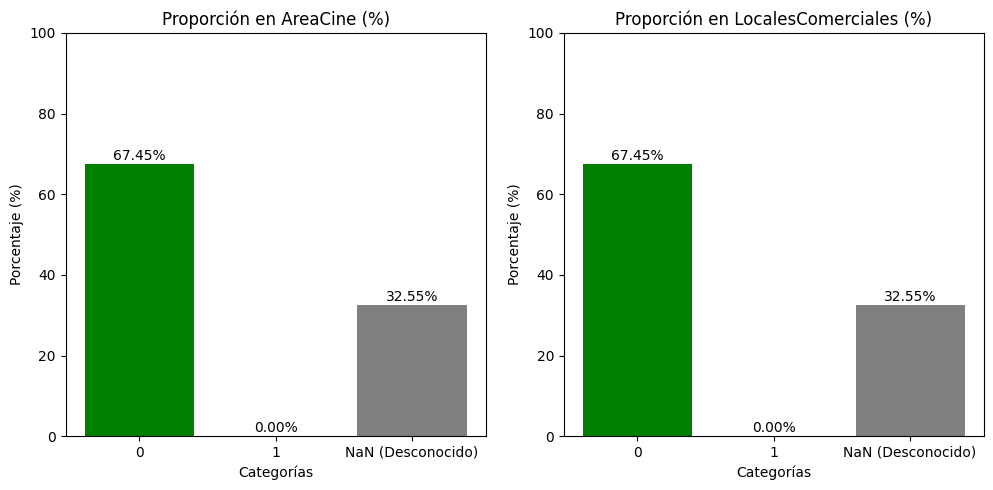

In [317]:
pp.get_binary_plot(data_context,context)

Como ninguna de las dos tiene valores positivos para estas categroais, carece de sentido considerarlas en nuestro modelo.

## Publicacion

En primer lugar, la categoria 'SitioOrigen' que se supone que muestra de donde proviene la publicacion. No obstante, vemos que esta categoria no tiene informacion relevante, ya que el 99.967% de los datos son de fuente desconocida (ya sea que son de valor 0 o Nan). Por lo tanto, no vamos a considerar esta categoria en nuestro modelo.

In [318]:
print('All SitioOrigen Nan values:', data['SitioOrigen'].isna().sum() / data.values.shape[0])
print(data['SitioOrigen'].value_counts() / data.values.shape[0])

All SitioOrigen Nan values: 0.3254856937841959
SitioOrigen
0.0                         0.436416
0                           0.167965
0.0                         0.070101
churbapropiedades.com.ar    0.000025
administracional.com.ar     0.000007
Name: count, dtype: float64


Ahora vemos la relevancia de la fecha de publicacion del anuncio (la categoria Año no la consideramos ya que esa informacion ya esta contenida en la categoria MesListing). Primero vemos si hay alguna relacion entre el precio y la fecha de publicacion.

24
  MesListing  precio_pesos_constantes
0 2022-08-01             6.279294e+03
1 2021-04-01             1.092339e+04
2 2021-09-01             1.081992e+04
3 2022-11-01             1.230069e+05
4 2021-04-01             7.714647e+06


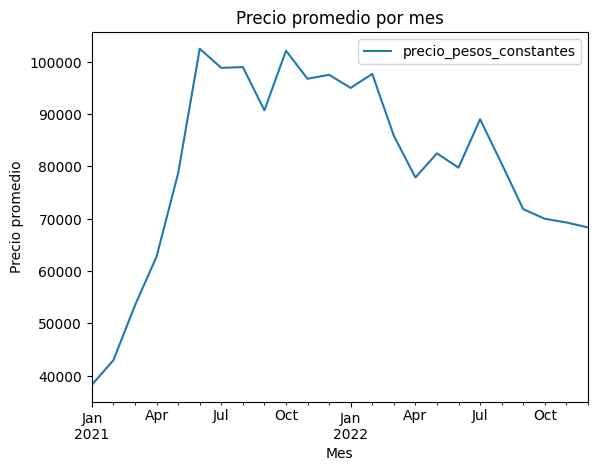

In [323]:
fecha_publicacion = pd.to_datetime(data['MesListing'], format='%Y-%m-%d')
fecha_publicacion = pd.concat([fecha_publicacion, data['precio_pesos_constantes']], axis=1) 
print(len(fecha_publicacion['MesListing'].unique())) #coincide con lo que dice el dataset
print(fecha_publicacion.head())

#grafico de precio promedio por mes
fecha_publicacion.groupby('MesListing').mean().plot()
plt.title('Precio promedio por mes')
plt.ylabel('Precio promedio')
plt.xlabel('Mes')
plt.show()

Veamos si es que realmente hay una relacion o esto se debe al promedio con algun outlier que hace parecer que exista alguna relacion.

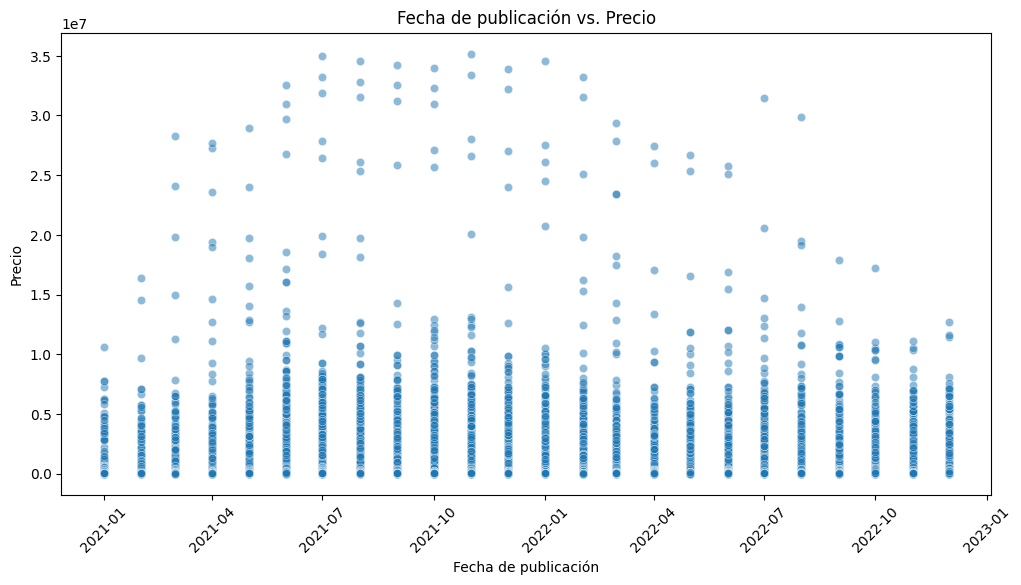

In [320]:
# Graficar la fecha de publicación frente al precio
plt.figure(figsize=(12, 6))
sns.scatterplot(x=fecha_publicacion['MesListing'], y=fecha_publicacion['precio_pesos_constantes'], alpha=0.5)
plt.title('Fecha de publicación vs. Precio')
plt.xlabel('Fecha de publicación')
plt.ylabel('Precio')
plt.xticks(rotation=45)
plt.show()

Aunque vemos que en los meses que hubo una suba, esto parece que se describe por la publicacion de propiedades con valores altos. Si bien vemos que los outliers distorcionan en gran parte el grafico del precio promedio, vemos que-si tomamos valores hasta el 1.2 x 10 ** 7 (a ojo), parece que puede ser que exista cierta relacion entre el precio y la fecha de publicacion. Tambien queremos ver la cobertura de estos datos en el tiempo, para ver que tan fiables o representativos son estos datos.

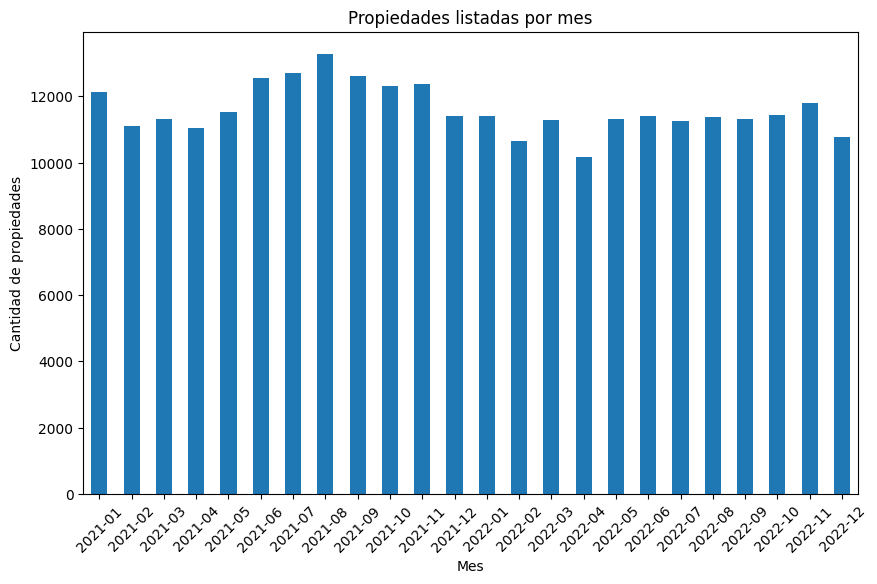

In [321]:
fecha_publicacion = fecha_publicacion.sort_values(by='MesListing', ascending=True)
fecha_publicacion['Mes'] = fecha_publicacion['MesListing'].dt.to_period('M')
meses_count = fecha_publicacion['Mes'].value_counts().sort_index()

# Graficar
meses_count.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Mes')
plt.ylabel('Cantidad de propiedades')
plt.title('Propiedades listadas por mes')
plt.xticks(rotation=45)
plt.show()

Parecen bastante confiables los datos, por lo que vamos a recortar nuestro dataset, eliminando lo que consideramos outliers, y vamos a ver si obervamos un patron parecido al anterior, si esto ocurre, podemos decir con seguridad que los outliers no hacen que se distorcionen los datos, y podemos considerarlo para nuestro modelo.

Porcentaje total de los datos tomados: 98.916 %


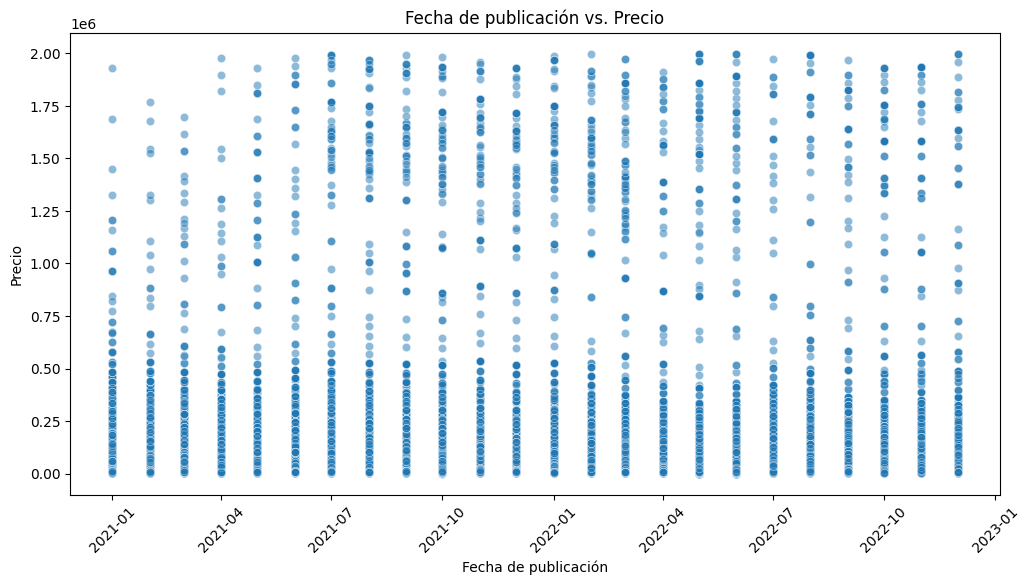

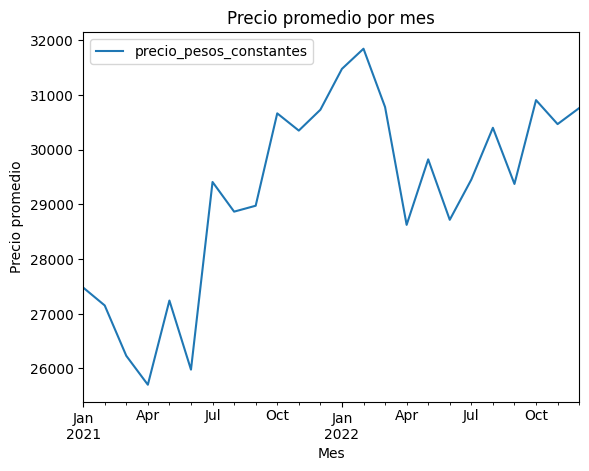

Porcentaje total de los datos tomados: 98.916 %


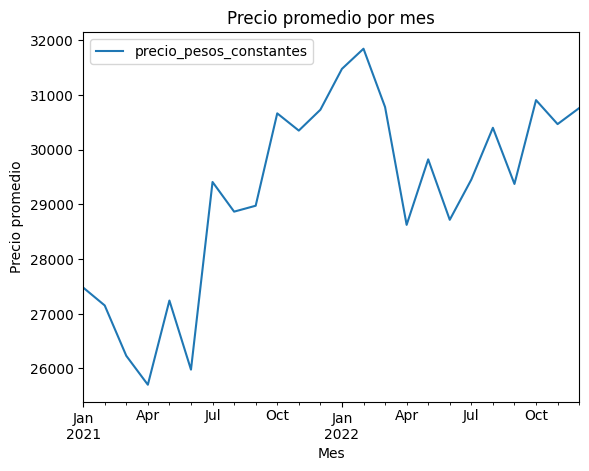

In [322]:
# hacer que los valores de fecha_publicacion que sean mayores a 1.5 1e6 los quito
fecha_publicacion = fecha_publicacion[fecha_publicacion['precio_pesos_constantes'] < 2e6]
print('Porcentaje total de los datos tomados:', np.round(len(fecha_publicacion) / len(data),5) * 100, '%')

plt.figure(figsize=(12, 6))
sns.scatterplot(x=fecha_publicacion['MesListing'], y=fecha_publicacion['precio_pesos_constantes'], alpha=0.5)
plt.title('Fecha de publicación vs. Precio')
plt.xlabel('Fecha de publicación')
plt.ylabel('Precio')
plt.xticks(rotation=45)
plt.show()

fecha_publicacion.groupby('MesListing').mean().plot()
plt.title('Precio promedio por mes')
plt.ylabel('Precio promedio')
plt.xlabel('Mes')
plt.show()

fecha_publicacion2 = fecha_publicacion[fecha_publicacion['precio_pesos_constantes'] < 4e6]
print('Porcentaje total de los datos tomados:', np.round(len(fecha_publicacion2) / len(data),5) * 100, '%')

fecha_publicacion2.groupby('MesListing').mean().plot()
plt.title('Precio promedio por mes')
plt.ylabel('Precio promedio')
plt.xlabel('Mes')
plt.show()

Vemos que la distribuion es casi la misma, por lo que podemos considerar que la fecha de publicacion puede ser una variable relevante para nuestro modelo.